# DETECÇÃO DE DOENÇAS HEPÁTICAS

In [ ]:
# BIBLIOTECAS NECESSÁRIAS
import warnings 
warnings.filterwarnings ('ignore')

import os
import pandas as pd
# BIBLIOTECAS DE GRÁFICO
import seaborn as sns
import matplotlib.pyplot as plt
# BIBLIOTECAS DE MACHINE LEARNING
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
# BIBLIOTECAS DE MÉTRICAS
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# CARREGAR O DATASET
data = pd.read_csv ('/content/drive/MyDrive/indian_liver_patient.csv')
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
# VER AS INFORMAÇÕES DA BASE DE DADOS 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
# MOSTRAR O CABEÇALHO E AS 5 PRIMEIRAS LINHAS
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


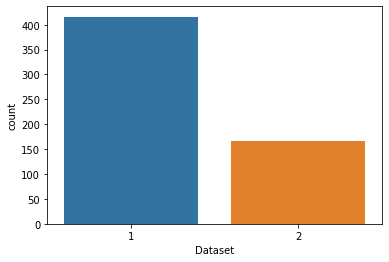

In [ ]:
# VISUALIZAR A COLUNA Dataset EM GRÁFICO 
# OBS: '1' PESSOAS QUE NÃO TEM DOENÇA, E '2' PESSOAS QUE TEM DOENÇA
data ['Dataset'].value_counts()
sns.countplot (data['Dataset'])

In [ ]:
# VERIFICAR A COLUNA DE GÊNEROS
data ['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [ ]:
# VISUALIZAR MAIS DETALHES DO DATASET
print(data.describe())

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529 

In [ ]:
# EXCLUIR VALORES VAZIOS DA BASE DE DADOS
data.dropna (inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [ ]:
# TRANSFORMAR VALORES NÃO NUMÉRICOS EM NÚMERICOS
# A COLUNA Gender PASSARÁ A SER AGORA VALORES BINÁRIOS
label = LabelEncoder()
data.Gender = label.fit_transform(data.Gender)

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# VISUALIZAR AS CORRELAÇÕES DAS VARIÁVEIS, ORDENADO DO MAIOR PARA O MENOR
data.corr().Dataset.sort_values (ascending= False)

Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.159770
Total_Protiens                0.033614
Gender                       -0.081349
Age                          -0.133164
Aspartate_Aminotransferase   -0.151834
Alamine_Aminotransferase     -0.163117
Alkaline_Phosphotase         -0.183363
Total_Bilirubin              -0.220218
Direct_Bilirubin             -0.246273
Name: Dataset, dtype: float64

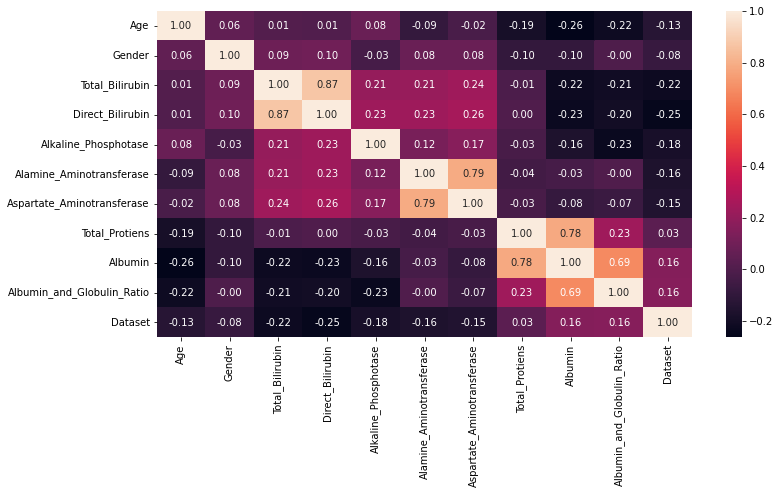

In [ ]:
# MOSTRAR MAPA DE CORRELAÇÕES DAS VARIÁVEIS NO GRÁFICO MATRIZ DE CONFUSÃO
# QUANDO MAIS CLARO A COR NO GRÁFICO, MAIOR A CORRELAÇÃO DAS VARIÁVEIS E QUANDO MAIS ESCURAS MENOR A CORRELAÇÃO
f, ax = plt.subplots (figsize = (12,6))
sns.heatmap (data.corr(), annot= True, fmt= '.2f')

In [ ]:
# DEFINIR A VARIÁVEL X DEPENDENTE E A VARIÁVEL Y INDEPENDENTE
x = data.drop ('Dataset', axis=1)
y = data ['Dataset']

# UTILIZAR OS MODELOS DE MACHINE LEARNING

In [ ]:
# SEPARAR A BASE DE DADOS EM TREINO E TESTE
x_treino ,x_teste ,y_treino , y_teste =train_test_split (x, y, test_size=0.2, random_state=7)

MODELO RANDOM FOREST

In [ ]:
# CRIAR A INTELIGÊNCIA ARTIFICIAL E TREINAR
model = RandomForestClassifier().fit (x_treino, y_treino)
model

RandomForestClassifier()

In [ ]:
# PASSAR PARA O MODELO TREINAR COM DADOS QUE ELE NÃO VIU
y_predict = model.predict (x_teste)

In [ ]:
# COMPARAR VALORES REAIS E PREVISTOS
actual_vs_precdict = pd.DataFrame ({'Gabarito (valor real)': y_teste, 'Previsão da máquina': y_predict})
actual_vs_precdict.sample(12)

,Gabarito (valor real),Previsão da máquina
496,1,2
473,2,1
132,2,2
484,1,1
267,1,2
364,2,1
457,2,1
348,1,1
281,2,1
381,1,2


# AVALIAÇÃO DA MÁQUINA PREDITIVA

In [ ]:
# AVALIAR O MODELO
print('Classification metrics: \n', classification_report (y_teste, y_predict))
print('Acurácia: \n', accuracy_score (y_teste, y_predict))
print('Confusion Matrix: \n', confusion_matrix (y_teste, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           1       0.80      0.84      0.82        88
           2       0.39      0.32      0.35        28

    accuracy                           0.72       116
   macro avg       0.59      0.58      0.59       116
weighted avg       0.70      0.72      0.71       116

Acurácia: 
 0.7155172413793104
Confusion Matrix: 
 [[74 14]
 [19  9]]


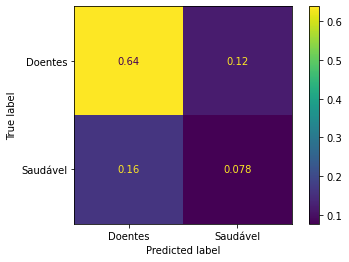

In [ ]:
# AVALIAR O MODELO NO GRÁFICO DE MATRIZ DE CONFUSÃO
cm = confusion_matrix (y_teste, y_predict, normalize='all')
matrix = ConfusionMatrixDisplay (cm, display_labels = ['Doentes', 'Saudável'])
matrix.plot()

MODELO XGBOOST

In [ ]:
# CRIAR A INTELIGÊNCIA ARTIFICIAL E TREINAR
model = XGBClassifier (learning_rate=0.2, max_depth=1).fit (x_treino, y_treino)
model

XGBClassifier(learning_rate=0.2, max_depth=1)

In [ ]:
# PASSAR PARA O MODELO TREINAR COM DADOS QUE ELE NÃO VIU
y_predict = model.predict (x_teste)

In [ ]:
# COMPARAR VALORES REAIS E PREVISTOS
actual_vs_precdict = pd.DataFrame ({'Gabarito (valor real)': y_teste, 'Previsão da máquina': y_predict})
actual_vs_precdict.sample(12)

,Gabarito (valor real),Previsão da máquina
89,1,1
563,1,1
46,1,1
52,1,1
162,1,1
146,1,1
405,1,1
443,1,1
473,2,1
223,2,1


# AVALIAÇÃO DA MÁQUINA PREDITIVA

In [ ]:
# AVALIAR O MODELO
print('Classification metrics: \n', classification_report (y_teste, y_predict))
print('Acurácia: \n', accuracy_score (y_teste, y_predict))
print('Confusion Matrix: \n', confusion_matrix (y_teste, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           1       0.80      0.89      0.84        88
           2       0.47      0.32      0.38        28

    accuracy                           0.75       116
   macro avg       0.64      0.60      0.61       116
weighted avg       0.72      0.75      0.73       116

Acurácia: 
 0.75
Confusion Matrix: 
 [[78 10]
 [19  9]]


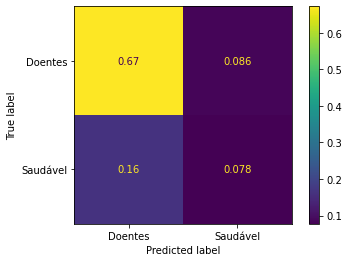

In [ ]:
# AVALIAR O MODELO EM GRÁFICO
cm = confusion_matrix (y_teste, y_predict, normalize='all')
matrix = ConfusionMatrixDisplay (cm, display_labels = ['Doentes', 'Saudável'])
matrix.plot()

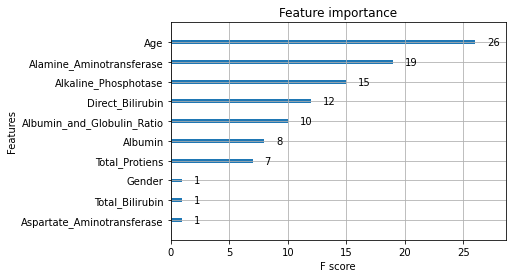

In [ ]:
plot_importance(model)
plt.show()

# RESUMO

In [ ]:
# BASE DE DADOS COM 583 LINHAS E 11 COLUNAS
# ESSE CONJUNTO DE DADOS TEM 416 REGISTROS DE PACIENTES DO FÍGADO E 167 REGISTROS DE DOENÇAS DO FÍGADO O NORDESTE DO ANDHRA PRADESH, NA ÍNDIA
# FAZER UMA ANÁLISE PREDITIVA PARA PREVER QUAIS PESSOAS TEM DOENÇAS HEPÁTICA E QUAIS NÃO TEM
# FORAM UTILIZADOS 2 MODELOS DE MACHINE LEARNING, O RANDOM FLOREST CLASSIFIER E O XGBOOST
# O MODELO XGBOOST TEVE MELHOR NÚMERO DE ACERTOS 